<a href="https://colab.research.google.com/github/kenanmorani/Images_Preprocessing/blob/main/Image_Segmentation_Methods_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Image Segmentation Methods Comparison
* This notebook tests three different image segmentation methods; Thresholding, Edge-Based, and Region-Based.
* The image is a CT scan slice taken from COV-19-CT database.
* Dependencies are: skimage, open-cv, numpy, and matplotlib.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
from skimage.io import imread
from skimage.color import rgb2gray
import cv2

from skimage import data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Reading the image
image = cv2.imread('/content/drive/MyDrive/Covid_data/Training Set/covid/covid/ct_scan_100/22.jpg')

In [36]:
# Image in grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [37]:
# Blurring the image [img]
img = cv2.GaussianBlur(image, (5, 5), 0)

## Thresholding - Otsu

In [89]:
# img = cv2.threshold(img, 115, 255, cv2.THRESH_BINARY)[1]
(T, img) = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
img = cv2.erode(img, None, iterations=2)
img = cv2.dilate(img, None, iterations=2)

In [39]:
T

112.0

Text(0.5, 1.0, 'Segmented Image')

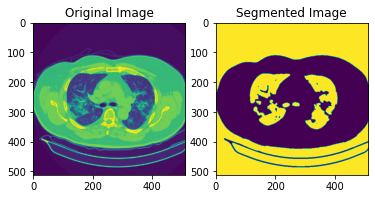

In [40]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image)
#plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title('Segmented Image')

In [41]:
from google.colab.patches import cv2_imshow

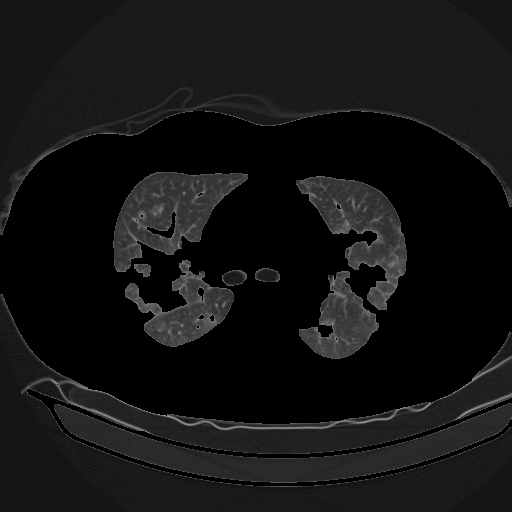

In [73]:
# visualize only the masked regions in the image
masked = cv2.bitwise_and(img, image, mask=img)
cv2_imshow(masked)
#cv2.waitKey(0)

REFERENCE:
https://www.pyimagesearch.com/2021/04/28/opencv-thresholding-cv2-threshold/

## Edge Based Segmentation


In [43]:
from skimage.feature import canny

In [74]:
edges = canny(img/255.)

Text(0.5, 1.0, 'Canny detector')

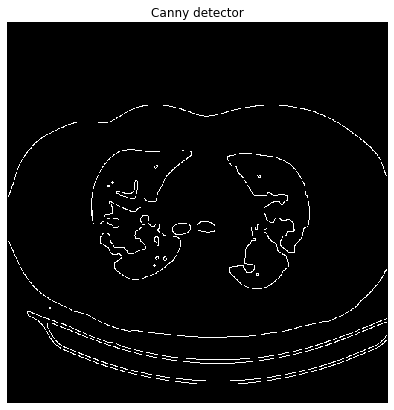

In [75]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Canny detector')

Text(0.5, 1.0, 'Filling the holes')

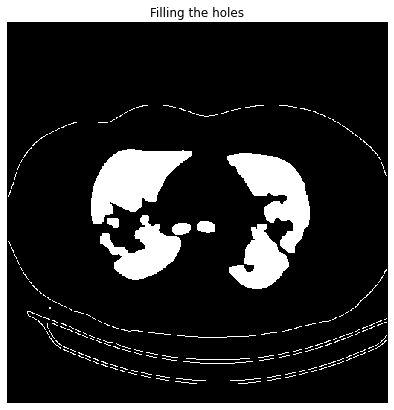

In [76]:
# Filling the holes using mathematical morphology
from scipy import ndimage as ndi

fill_img = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(fill_img, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Filling the holes')

Text(0.5, 1.0, 'Removing small objects')

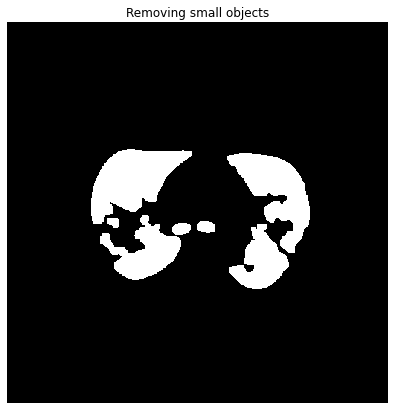

In [87]:
# Small spurious objects are easily removed by setting a minimum size for valid objects.
from skimage import morphology

# setting a minimum size for valid objects.
img_cleaned = morphology.remove_small_objects(fill_img, 60)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img_cleaned, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Removing small objects')

## Region Based Segmentation

In [48]:
from skimage.filters import sobel

In [49]:
elevation_map = sobel(image)

Text(0.5, 1.0, 'elevation_map')

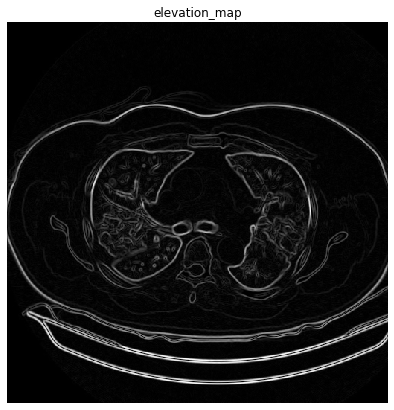

In [50]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')

In [71]:
# we find markers of the background and the coins based on the extreme parts of the histogram of grey values
markers = np.zeros_like(image)
# Choosing extreme parts of the histogram of grey values
markers[image < 60] = 1
markers[image > 250] = 2

/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Text(0.5, 1.0, 'segmentation')

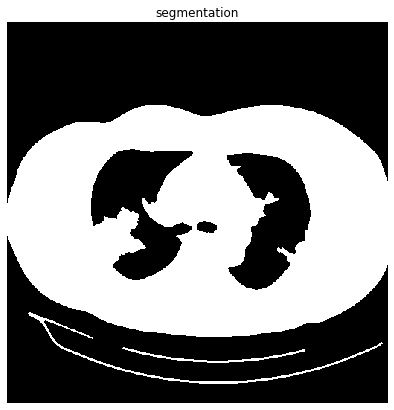

In [72]:
#we use the watershed transform to fill regions of the elevation map starting from the markers determined above:
segmentation = skimage.morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('segmentation')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """


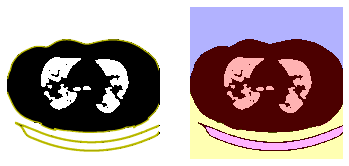

In [54]:
from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=img)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
ax1.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
ax1.set_adjustable('box')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
ax2.set_adjustable('box')

## References:
* https://scikit-image.org/docs/0.12.x/auto_examples/xx_applications/plot_coins_segmentation.html



